## 1. Tyrimo pavadinimas, autorius, akademinė grupė, data.

**Tyrimo pavadinimas:** Betono įtrūkimų vaizdų klasifikavimas <br>
**Autorius:** Vitas Vainauskas <br>
**Akademinė grupė:** MGDVDAM-2 <br>
**Data:** 2023-10-24

## 2. Tikslas ir uždaviniai (bent 3, įskaitant apžvalginę duomenų analizę) jam pasiekti.

**Tikslas:** atlikti betono įtrūkimo vazidų klasifikavimą į vaizdus be trūkio ir į vaizdus su ir ištirti triukšmo įtaką.<br></br>
Tikslui pasiekti buvo iškelti šie **uždaviniai**:
1. Atlikti apžvalginę duomenų analizę.
2. Sudaryti ir įvertinti modelį, skirtą betono įtrūkimų vaizdų klasifikavimui.
3. Testinę duomenų aibę paveikti Gauso triukšmu (įvairiu intensyvumu) ir patikrinti, ar pablogėjo modelio tikslumas ir jei pablogėjo tai, kiek pablogėjo.

## 3. Trumpas naudojamų matematinių metodų aprašymas (kas per metodas, kokius naudoja duomenis, kokios yra prielaidos, ką juo galime pasiekti). Gali būti labai trumpa literatūros apžvalga, bet nėra būtina

### 3.1. CNN

Sąsukų neuroniniai tinklai (CNN) yra dirbtinių neuroninių tinklų (DNN) rūšis. CNN yra specializuoti neuroniniai tinklai, kurie gali efektyviai atpažinti ir išmokti savybes iš vaizdų arba kitokio tipo duomenų.<br>

Prielaidos, kurios pagrindžia CNN veikimą, apima:

- Lokaliųjų savybių ekstrakciją: CNN gali išgauti savybes iš mažų įvesties sričių, atpažindami vietinius modelio bruožus (pavyzdžiui, kraštus ar tekstūras).
- Savybių bendrinimą: CNN modeliai gali mokytis bendrų savybių, kurios yra naudingos įvairioms užduotims, pavyzdžiui, vaizdų klasifikacijai ar objektų aptikimui.
- Hierarchinį požymių išskyrimą: CNN gali sujungti daug sluoksnių, kad išskirtų vis sudėtingesnes ir abstraktesnes savybes. Tai leidžia tinklui suprasti hierarchinius vaizdų bruožus.

Naudojant CNN galima pasiekti daugybę rezultatų:
- Klasifikuoti vaizdus.
- Aptikti objektus.
- Spręsti kompiuterinės regos uždavinius.

Sąsukų operacijos formulė: <br><br>
$G(i, j) = \sum \limits _{u = -k} ^{k} \sum \limits _{u=-k} ^{k}H(u,v) \cdot F(i-u, j-v) $ <br>

Čia:
- $G(i, j)$ yra išėjimo požymių taškas sąsukų sluoksnyje, esantis pozicijoje $(i,j)$.
- $F(m-i, n-j)$ yra filtro F reikšmė pozicijoje $(m-i,n-j)$.
- $H(u,v)$ yra paveikslėlis taške $(u,v)$
- $k$ yra branduolio dimensijos

### 3.2. Gauso triukšmas

Gauso triukšmas (angl. Gaussian noise) yra statistinis signalų apdorojimo ir stochastinių procesų kontekste naudojamas terminas, kuris nurodo triukšmą arba neapibrėžtumą, atsirandančią dėl atsitiktinių veiksnių. Šis triukšmas yra pavadintas pagal normalųjį (Gaussian) skirstinį, nes daugeliui natūralių procesų galioja šis pasiskirstymas.

Prielaidos:

- Nepriklauso nuo ankstesnių įvykių: Gauso triukšmas laikomas nepriklausomu ir atsitiktiniu, tai reiškia, kad jis neturi jokio ryšio su ankstesniais įvykiais.
- Normalusis pasiskirstymas: Gauso triukšmas dažnai laikomas normaliuoju pasiskirstymu, o tai reiškia, kad jis turi vidurkį ir standartinį nuokrypį.

Kur naudojamas Gauso triukšmas:

- Signalų apdorojimas: Gauso triukšmas dažnai naudojamas signalų apdorojimo srityje, pavyzdžiui, siekiant modeliuoti signalų, kaip garso ar vaizdo, triukšmą.
- Duomenų generavimas: Jis taip pat naudojamas sintetinių duomenų generavime, pavyzdžiui, siekiant sukurti duomenis, kurie atspindi realaus pasaulio neapibrėžtumą.
- Statistinė analizė: Gauso triukšmas dažnai pasitaiko statistinėje analizėje kaip atsitiktinis įvykis, kuris gali turėti įtakos tyrimo rezultatams.

Normaliojo skirstinio tikimybių tankio funkcija:

$N(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$


## 4. Tiriamoji dalis, kurioje yra išpildomi visi keliami uždaviniai, pakomentuojami ir išaiškinami atitinkamų tyrimų rezultatai. Aprašoma, kiek yra pasiektas tikslas. Aprašomas savo sukurto modulio / bibliotekos taikymas.

### 4.1 Modulio importavimas

In [1]:
import importlib

import image_classification

importlib.reload(image_classification)

<module 'image_classification' from 'd:\\Users\\UFO\\My Drive\\Vitas\\Didžiųjų verslo duomenų analitika\\3 semestras\\Python taikymas duomenų moksle\\Laboratorinis darbas\\image_classification.py'>

### 4.2 Modulio paleidimas

**************************************************
Apžvalginė duomenų analizė
**************************************************
Atvaizduotos 5 nuotraukos su betono trūkiais ir 5 nuotraukos be betono trūkių


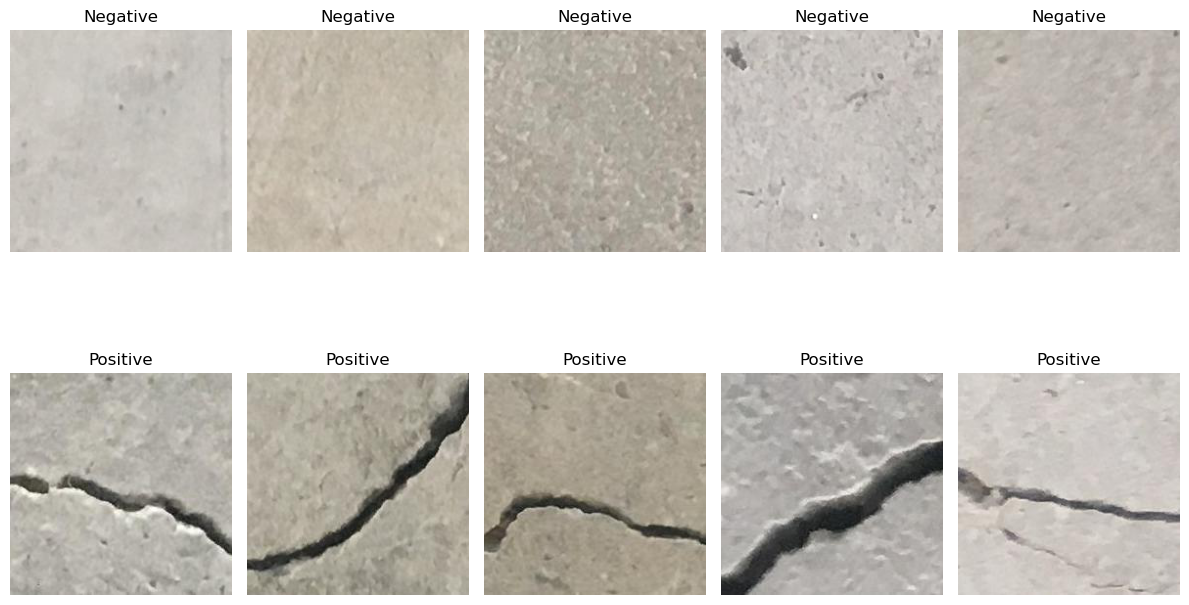

Atvaizduotas grafikuose paveikslėlių išmatavimų pasiskirstymas. Matome, kad visų paveikslėlių dimensijos yra 277 x 277


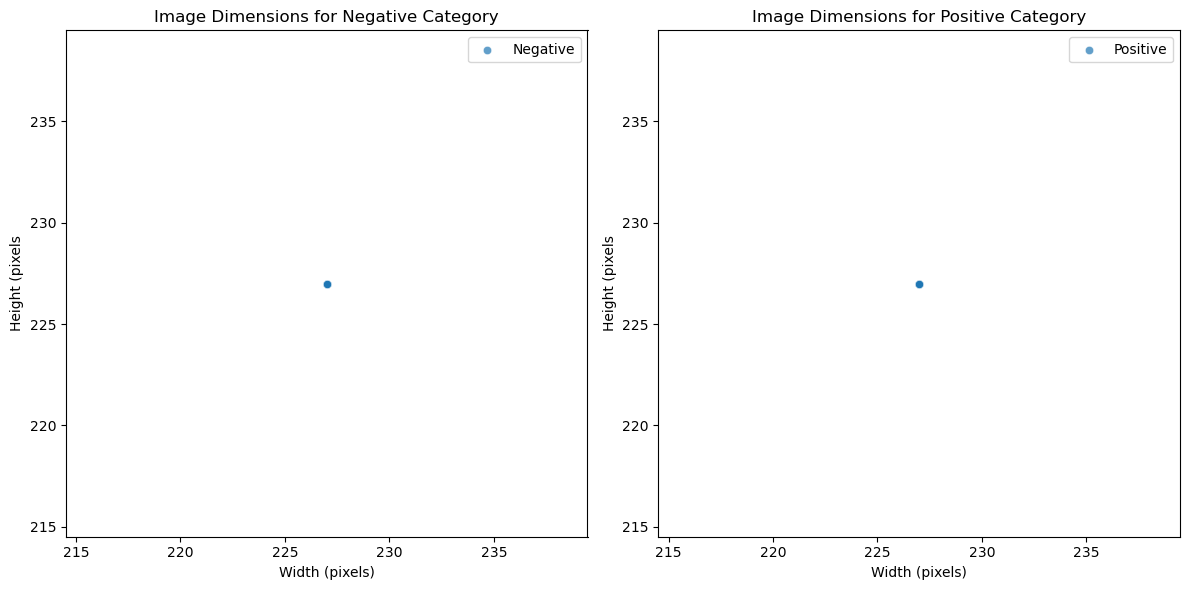

Paveikslėlių su trūkiais ir be trūkių užimamos vietos pasiskirstymas


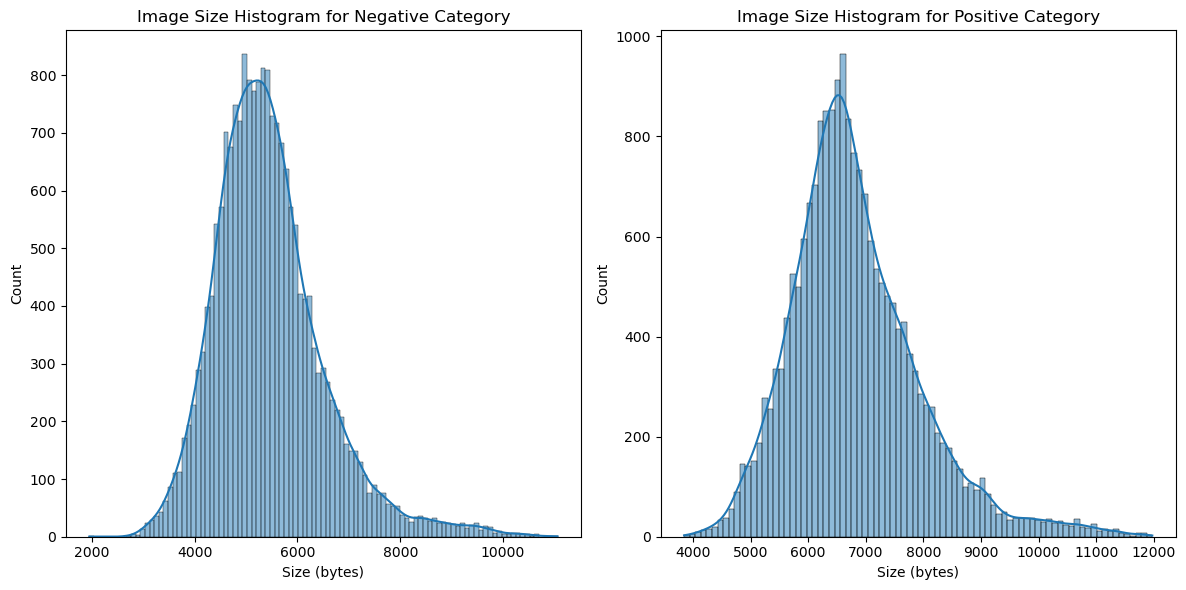

Paveikslėlių be trūkių užimamos vietos statistika:
count    20000.000000
mean      5453.508000
std       1074.450007
min       1949.000000
25%       4741.750000
50%       5321.000000
75%       5973.000000
max      11060.000000
Name: size_bytes, dtype: float64
Asimetrijos: koeficientas: 1.0393275108985125
Ekscesas: 2.1414556149229496

Paveikslėlių su trūkiais užimamos vietos statistika:
count    20000.000000
mean      6819.641150
std       1127.661738
min       3845.000000
25%       6091.000000
50%       6655.000000
75%       7406.000000
max      11972.000000
Name: size_bytes, dtype: float64
Asimetrijos koeficientas: 0.9345470224945785
Ekscesas: 1.6722961862977614
Galime matyti, kad paveisklėlių su trūkiais vidutinė užimamos vietos reikšmė yra didesnė. Taip pat asimetrijos koeficientas ir ekscesas yra mažesnis

Duomenų rinkinį sudaro 20000 nuotraukų su betono trūkiais ir 20000 be betono trūkių.



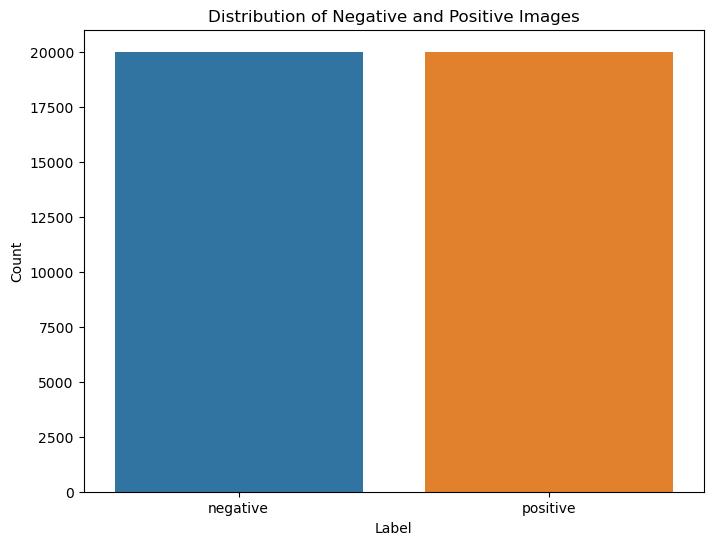

**************************************************
Modelio sudarymas
**************************************************
Found 6000 validated image filenames belonging to 2 classes.
Found 2000 validated image filenames belonging to 2 classes.
Found 2000 validated image filenames belonging to 2 classes.
Apmokomas modelis
Epoch 1/69
188/188 [==============================] - 25s 116ms/step - loss: 0.6643 - accuracy: 0.6093 - val_loss: 0.6174 - val_accuracy: 0.6475
Epoch 2/69
188/188 [==============================] - 18s 95ms/step - loss: 0.5328 - accuracy: 0.7968 - val_loss: 0.4693 - val_accuracy: 0.9095
Epoch 3/69
188/188 [==============================] - 16s 85ms/step - loss: 0.3593 - accuracy: 0.9128 - val_loss: 0.3091 - val_accuracy: 0.9350
Epoch 4/69
188/188 [==============================] - 18s 94ms/step - loss: 0.2407 - accuracy: 0.9423 - val_loss: 0.2230 - val_accuracy: 0.9420
Epoch 5/69
188/188 [==============================] - 18s 94ms/step - loss: 0.1755 - accuracy: 0.9562 

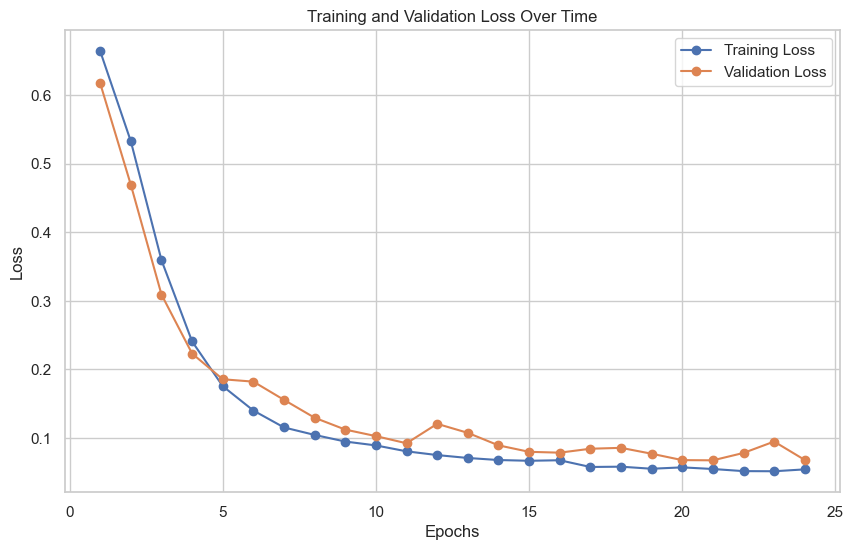

Modeliui sudaryti užteko 20 epochų,  kur treniravimo ir patvirtinimo praradimas (loss) siekė apie 0.06
**************************************************
Modelio vertinimas
**************************************************

Įvertinus modelį nustatyta, kad modelis gali nustatyti betono įtrūkimus 97% tikslumu
63/63 [==============================] - 3s 45ms/step - loss: 0.0505 - accuracy: 0.9810
Test Loss: 0.05050761625170708
Test Accuracy: 0.9810000061988831
63/63 [==============================] - 4s 53ms/step


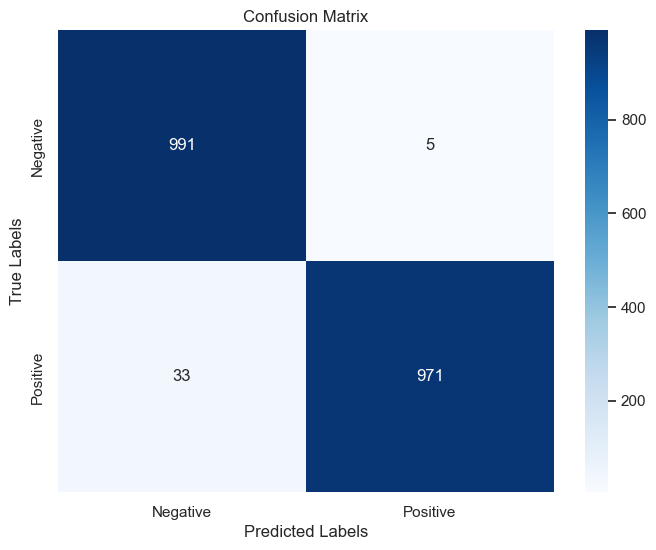

Classification Report:
               precision    recall  f1-score   support

    Negative       0.97      0.99      0.98       996
    Positive       0.99      0.97      0.98      1004

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Paveikus testinius paveiklėlius vis didesniais (0.1, 0.420 ir 0.6) triukšmo lygiais, modelio tikslumas vis labiau blogėjo.
Found 2000 validated image filenames belonging to 2 classes.
63/63 [==============================] - 14s 223ms/step - loss: 0.5446 - accuracy: 0.9160
Test Loss: 0.5446247458457947
Test Accuracy: 0.9160000085830688
63/63 [==============================] - 4s 60ms/step


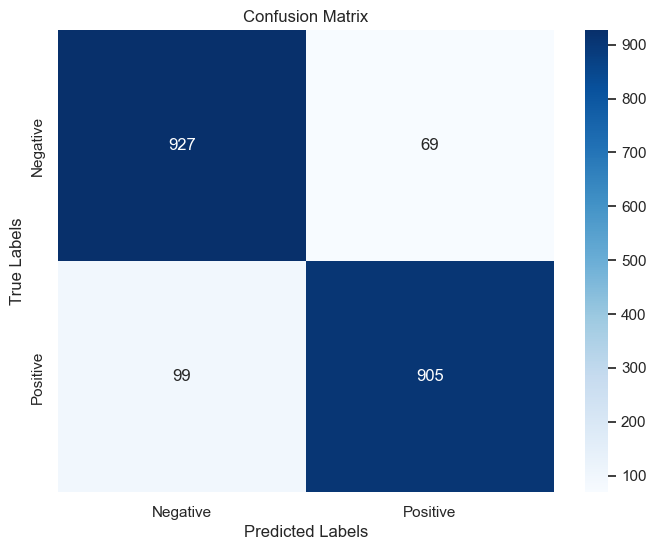

Classification Report:
               precision    recall  f1-score   support

    Negative       0.90      0.93      0.92       996
    Positive       0.93      0.90      0.92      1004

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000

Found 2000 validated image filenames belonging to 2 classes.
63/63 [==============================] - 14s 219ms/step - loss: 0.6474 - accuracy: 0.7810
Test Loss: 0.6474422812461853
Test Accuracy: 0.781000018119812
63/63 [==============================] - 4s 60ms/step


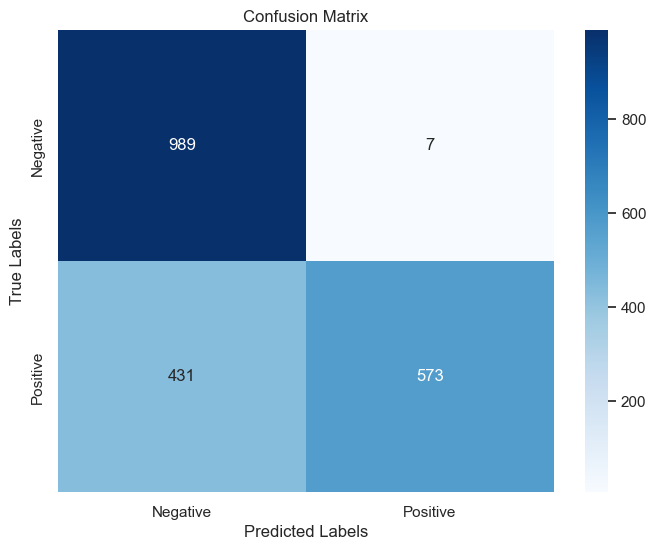

Classification Report:
               precision    recall  f1-score   support

    Negative       0.70      0.99      0.82       996
    Positive       0.99      0.57      0.72      1004

    accuracy                           0.78      2000
   macro avg       0.84      0.78      0.77      2000
weighted avg       0.84      0.78      0.77      2000

Found 2000 validated image filenames belonging to 2 classes.
63/63 [==============================] - 14s 224ms/step - loss: 0.6882 - accuracy: 0.7635
Test Loss: 0.688206672668457
Test Accuracy: 0.7634999752044678
63/63 [==============================] - 4s 66ms/step


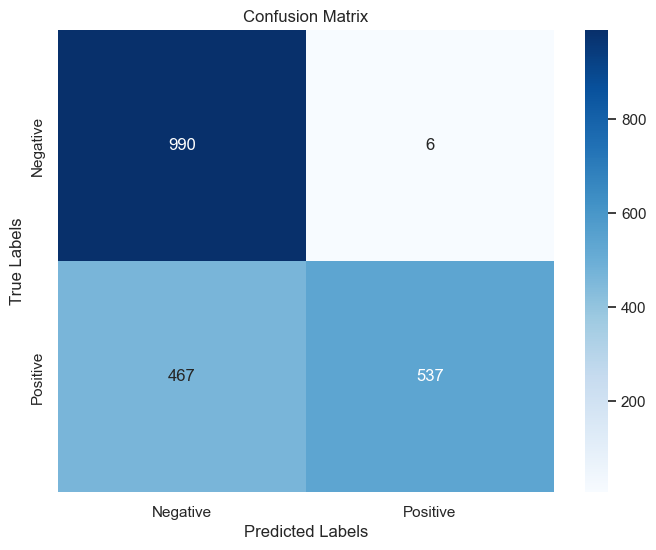

Classification Report:
               precision    recall  f1-score   support

    Negative       0.68      0.99      0.81       996
    Positive       0.99      0.53      0.69      1004

    accuracy                           0.76      2000
   macro avg       0.83      0.76      0.75      2000
weighted avg       0.83      0.76      0.75      2000



In [2]:
positive_folder = ""
negative_folder = ""
noise_levels = [0.1, 0.420, 0.69]
noisy_image_folder = ''

classifier = image_classification.ImageClassifier(
    positive_folder, negative_folder, noise_levels, noisy_image_folder)
classifier.run_classification()

### 4.4 Modulio taikymas

Šis Python klasės ImageClassifier modulis skirtas vaizdų betono įtrūkimo vaizdų klasifikavimui. <br>

Ši klasė vykdo šias užduotis:

1. load_image_paths_and_labels: Užkrauna vaizdų kodus iš nurodytų pozityvių ir negatyvių katalogų bei sukuria duomenų lentelę, kuri aprašo kiekvieno vaizdo kelią ir jo klasę (pozityvus arba neigiamas).
2. plot_images_matrix: Parodo atsitiktinius 5 pozityvius ir 5 neigiamus vaizdus matricoje.
3. create_image_dimensions_scatterplots: Sukuria dvi sklaidos diagramas, kurios rodo vaizdų plotį ir aukštį pozityvių ir neigiamų vaizdų grupėse.
4. create_image_size_histograms: Sukuria histogramas, kurios rodo vaizdų dydį baitais pozityvių ir neigiamų vaizdų grupėse.
5. plot_data_distribution: Parodo, kaip pasiskirsto pozityvių ir neigiamų vaizdų kiekis.
6. split_train_test_data: Padalina duomenis į mokymosi ir testavimo rinkinius.
7. create_data_generators: Sukuria vaizdų generatorius mokymosi ir testavimo rinkiniams.
8. build_model: Sukuria gilų neuroninį tinklą klasifikavimui.
9. train_model: Treniruoja modelį naudojant duomenis.
10. plot_training_history: Parodo modelio mokymosi istoriją, t. y. praradimo (loss) kitimą per epochas.
11. evaluate_model: Vertina modelio efektyvumą testavimo rinkinyje ir atvaizduoja klaidų matricą ir klasifikavimo ataskaitą.
12. add_noise_to_image: Prideda triukšmą prie vaizdo.
13. generate_noisy_images: Sukuria triukšmingus vaizdus ir vertina modelio veikimą su jais.
14. run_classification: Vykdymo funkcija, kuri paleidžia visus šiuos žingsnius nuosekliai.

Jei norite naudoti šį modulį savo vaizdų klasifikavimo projektui, turėtumėte nurodyti katalogų kelius, kur jūsų pozityvūs, neigiami vaizdai yra saugomi, nurodyt, kur bus saugomi vaizdai paveikti triukšmo, nurodyti triukšmo lygius bei paleisti run_classification funkciją. Modulis užkraus vaizdus, atliks jų analizę, treniruos modelį ir vertins jo efektyvumą. Taip pat jis sugeneruos vaizdus, paveiktus triukšmo, ir įvertins modelio tikslumą su šiais vaizdais.

### 4.5 Tikslo pasiekimas

Pavyko 100 % pasiekti tikslą. Buvo atlika apžvalginė duomenų analizė, sudarytas ir įvertintas modelis. Galiausiai testinius duomenis paveikus Gauso triukšmu buvo įvertintas modelio tikslumas.

## 5. Išvados, kurios atsako į kiekvieną uždavinį.

1. Apžvalginės duomenų analizės metu buvo nustatyta, kad visi paveikslėliai 277 x 277 pikselių išmatavimų, yra dvi paveikslėlių klasės ir kad paveikslėliai su trūkiais vidutiniškai daugiau vietos užimė
2. Sudarius ir įvertinus modelį ant testinės duomenų aibės buvo nustatyta, kad modelio tikslumas yra 97 %
3. Pastebėta, kad paveikus paveikslėlius vis didesniu Gauso triukšmu, modelio tikslumas vis labiau sumažėjo.

## 6. Literatūros sąrašas (pateikiamos nuorodos į duomenų rinkinį, teorinę medžiagą, jei reikia).

1. P160M014 Python taikymas duomenų moksle. (n.d.). Retrieved October 30, 2023, from https://moodle.ktu.edu/
2. Computer Graphics at Stanford University. (n.d.). https://graphics.stanford.edu/courses/cs148-10-summer/docs/04_imgproc.pdf 
3. Lecture 10 notes - Stanford University. (n.d.-b). https://stanford.edu/class/ee367/reading/lecture10_notes.pdf 